In [1]:
import sys
sys.path.append("../")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import MinMaxScaler
from addnet import SubNet

# constants
N_SAMPLES = 200
# Constants
h = .01  # step size in the mesh
figure = plt.figure(figsize=(12, 4))
FEATURE_RANGE=(0, 1)
SEED = 314

<Figure size 864x288 with 0 Axes>

[(0, None), (0, None), (None, None), (0, None), (0, None), (None, None), (None, None)]


../addnet/addnet.py:72: RuntimeWarning: divide by zero encountered in log
  return - ((1-y) * np.log(1-px) \
../addnet/addnet.py:72: RuntimeWarning: invalid value encountered in multiply
  return - ((1-y) * np.log(1-px) \


Text(0.5, 1.0, 'boundary')

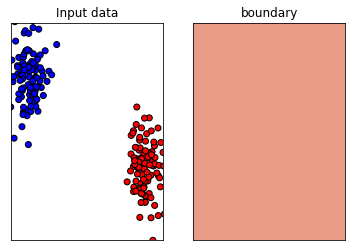

In [5]:
# PLOT DATASET
# x, y = make_moons(n_samples=N_SAMPLES, random_state=SEED)
x, y = make_blobs(n_samples=N_SAMPLES, centers=2, random_state=SEED)
x = MinMaxScaler(feature_range=FEATURE_RANGE).fit_transform(x)
x_train, y_train = x, y

x_min, x_max = FEATURE_RANGE
y_min, y_max = FEATURE_RANGE
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = plt.subplot(1, 2, 1)
# Plot the training points
ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("Input data")

# binarization
bin_width = [[0.25, 0.5, 0.75], [0.25, 0.5, 0.75]]
reverses = [False, False]
subnet = SubNet(bin_width, reverses)
subnet.fit(x_train, y_train)

# PLOT SVC BOUNDARY
ax = plt.subplot(1, 2, 2)
# Put the result into a color plot
z = subnet.predict(np.c_[xx.ravel(), yy.ravel()])
z[z>0] = 0.1; z[z<0] = -0.1
z = z.reshape(xx.shape)
ax.contourf(xx, yy, z, cmap=cm, alpha=.8)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("boundary")